# This is the code to run the KNN Model on rain data for UAE 

In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import array
from datetime import datetime
import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
from itertools import product
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from numpy import concatenate
from sklearn import neighbors
from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.neighbors import KNeighborsTimeSeriesRegressor

In [3]:
# Input Configuration
# 1. Path where input file is stored
filepath = "C:\CDrive\C_FULL\PHD\Coding Section\Forecasting\Combined Dataset_v2.csv"

# 2. Row number of starting month
startrow_training = 0
endrow_training = 194
startrow_test = 194
endrow_test = 205

# 3. Dependent variable name
dependent_var = "DXB_Daily_Avg_SR"

# 4. Number of KNN time steps 
n_steps = 3

In [4]:
df = pd.read_csv(filepath)
df.index.name = 'Month_Year'
df.set_index(df['Month_Year'], inplace=True)
df.head()

,Day,Month,Year,Month_Year,DXB_Daily_Avg_SR
Month_Year,,,,,
1-Jan-03,1,Jan,2003,1-Jan-03,3.4
1-Feb-03,1,Feb,2003,1-Feb-03,3.5
1-Mar-03,1,Mar,2003,1-Mar-03,9.1
1-Apr-03,1,Apr,2003,1-Apr-03,48.9
1-May-03,1,May,2003,1-May-03,0.3


In [5]:
# Divide the data into train and test datasets
train = df[dependent_var][startrow_training:endrow_training]
test = df[dependent_var][startrow_test:endrow_test]
train

Month_Year
1-Jan-03     3.4
1-Feb-03     3.5
1-Mar-03     9.1
1-Apr-03    48.9
1-May-03     0.3
            ... 
1-Oct-18     9.7
1-Nov-18     8.9
1-Dec-18     1.4
1-Jan-19     0.2
1-Feb-19     9.0
Name: DXB_Daily_Avg_SR, Length: 194, dtype: float64

In [6]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [7]:
colindex = df.columns.get_loc(dependent_var)
train_processed = df.iloc[startrow_training:endrow_training, colindex:colindex+1].values
#train_processed

In [8]:
X, y = split_sequence(train_processed, n_steps)
print("X: ", X.shape)
print("Y:", y.shape)

X:  (191, 3, 1)
Y: (191, 1)


In [9]:
knn = KNeighborsTimeSeriesRegressor(n_neighbors=2, metric='dtw')
knn.fit(X, y)

KNeighborsTimeSeriesRegressor(n_neighbors=2)

In [10]:
Knn_predictions_train = knn.predict(X)

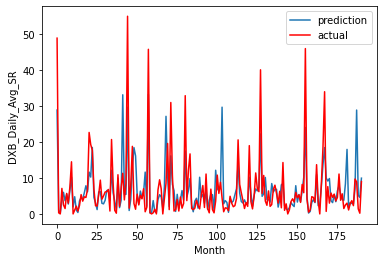

In [11]:
plt.plot(Knn_predictions_train,label='prediction')
plt.plot(y,color='red',label='actual')
plt.ylabel(dependent_var)
plt.xlabel('Month')
plt.legend()
plt.show()

In [12]:
def forecast_accuracy(forecast, actual):
   
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
 
    
    return({ 'me':me, 'mae': mae, 
            })

forecast_accuracy(Knn_predictions_train, y)

{'me': -0.12719834317539283, 'mae': 3.5347805699659687}